# Credit Card Fraud Detection

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### Understanding Data

In [ ]:
df = pd.read_csv("fraud_data.csv")
df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0


In [ ]:
df.head(10)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
5,05-01-2019 03:15,"""Raynor, Reinger and Hagenes""",gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,ef010a5f4f570d306a050a368ee2729d,64.088838,-165.104078,1
6,05-01-2019 03:21,Heller-Langosh,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,8e2d2fae5319d31c887dddbc70627ac4,63.917785,-165.827621,1
7,05-01-2019 11:31,Padberg-Welch,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,14-07-1954,5fbe827807ec9f557f6242bb48db0e51,39.167065,-93.705245,1
8,05-01-2019 18:03,McGlynn-Heathcote,misc_net,768.15,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,fba83e0a3adb530251295ab72a96b719,64.623325,-166.403973,1
9,05-01-2019 22:02,Dooley-Thompson,misc_net,849.49,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,b87c92d4824758e704da572891697fed,65.266065,-164.865352,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [ ]:
print(f'Number of rows is {df.shape[0]} and columns is {df.shape[1]}' )

Number of rows is 14446 and columns is 15


In [ ]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


### Data Cleaning

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format = '%d-%m-%Y %H:%M')
df = df[(df['is_fraud'] == '0') | (df['is_fraud'] == '1')]
df['is_fraud'] = df['is_fraud'].astype(int)
df['dob'] = pd.to_datetime(df['dob'], format = '%d-%m-%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14444 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14444 non-null  datetime64[ns]
 1   merchant               14444 non-null  object        
 2   category               14444 non-null  object        
 3   amt                    14444 non-null  float64       
 4   city                   14444 non-null  object        
 5   state                  14444 non-null  object        
 6   lat                    14444 non-null  float64       
 7   long                   14444 non-null  float64       
 8   city_pop               14444 non-null  int64         
 9   job                    14444 non-null  object        
 10  dob                    14444 non-null  datetime64[ns]
 11  trans_num              14444 non-null  object        
 12  merch_lat              14444 non-null  float64       
 13  merch_

In [ ]:
df.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

No null values are present in this dataset

In [ ]:
print(f'Total Duplicates:{df.duplicated().sum()}')
df = df.drop_duplicates()

Total Duplicates:63


All duplicate rows are removed from this dataset

### EDA

#### Univariate analysis

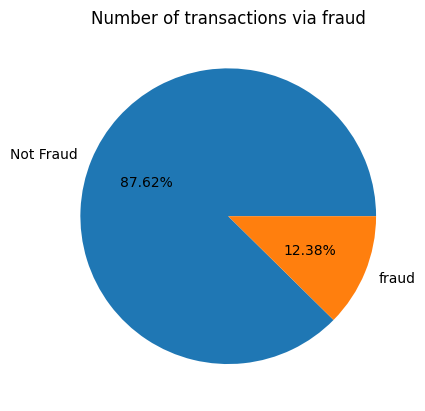

In [ ]:
values = df['is_fraud'].value_counts()
labels = df['is_fraud'].value_counts().index.map({0:'Not Fraud', 1:'fraud'})
plt.pie(values, labels = labels, autopct = '%1.2f%%')
plt.title('Number of transactions via fraud')
plt.show()

Only 12.3% of data are fraud transactions.

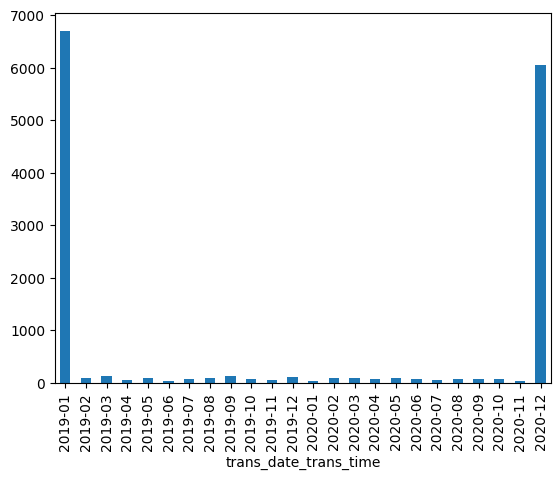

In [ ]:
trans_month_year = df['trans_date_trans_time'].dt.to_period('M')
trans_month_year.value_counts().sort_index().plot(kind = 'bar')
plt.show()

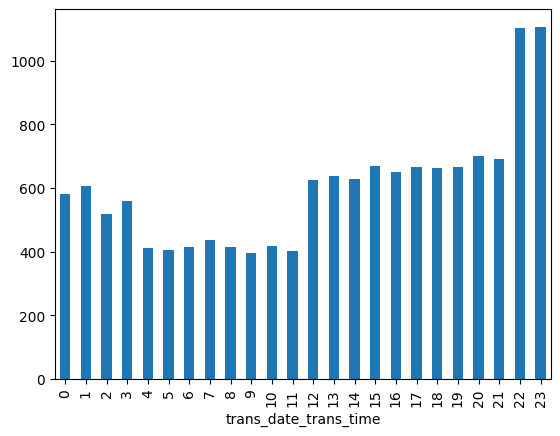

In [ ]:
trans_hour = df['trans_date_trans_time'].dt.hour
trans_hour.value_counts().sort_index().plot(kind = 'bar')
plt.show()

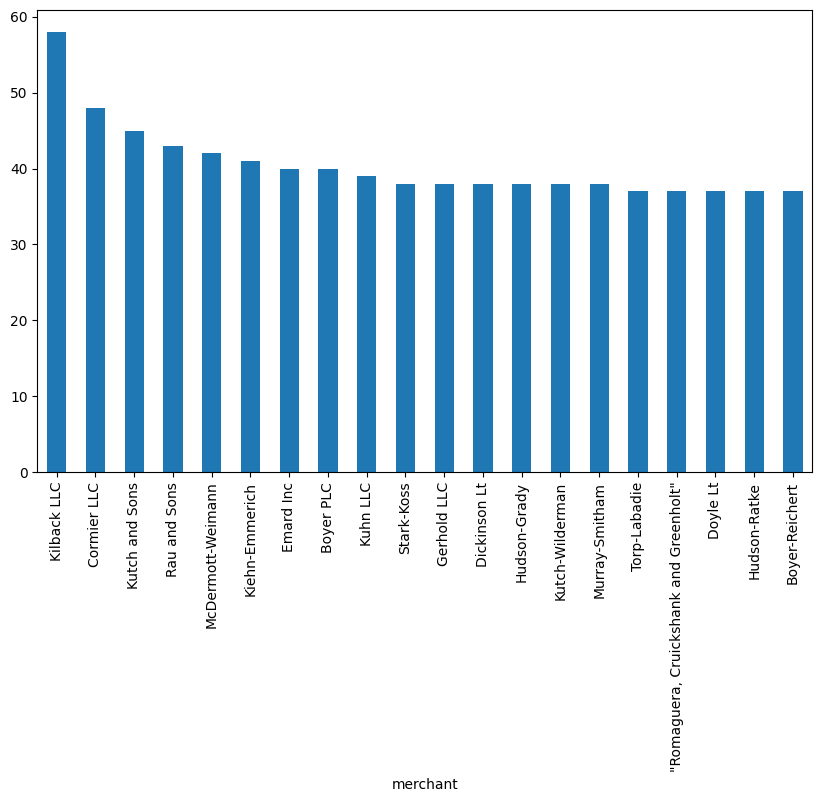

In [ ]:
plt.figure(figsize = (10, 6))
df['merchant'].value_counts().head(20).plot(kind = 'bar')
plt.show()

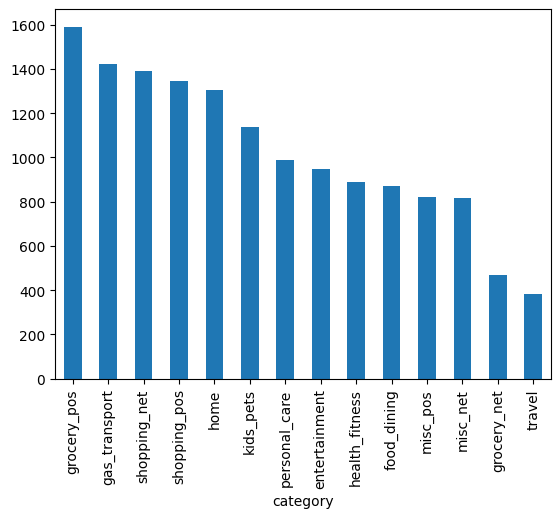

In [ ]:
df['category'].value_counts().plot(kind = 'bar')
plt.show()

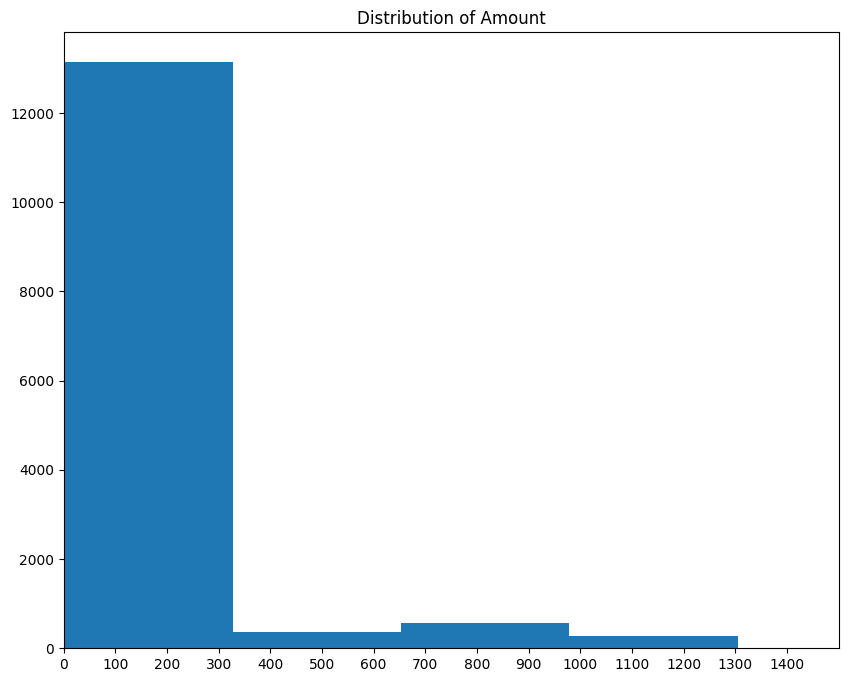

In [ ]:
plt.figure(figsize = (10, 8))
plt.hist(df['amt'])
plt.title('Distribution of Amount')
plt.xticks(np.arange(0,1500,100))
plt.xlim(0,1500)
plt.show()

The most of the amount transactions are between 0 to 400

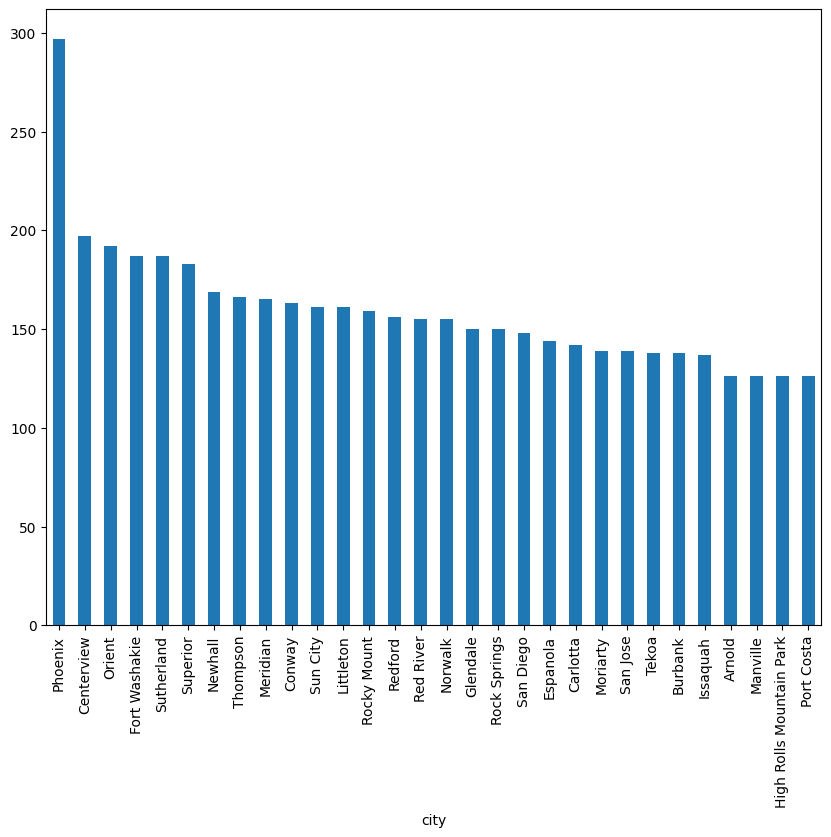

In [ ]:
plt.figure(figsize = (10, 8))
df['city'].value_counts().head(30).plot(kind = 'bar')
plt.show()

Pheonix city has more than 50% transactions compared to other cities

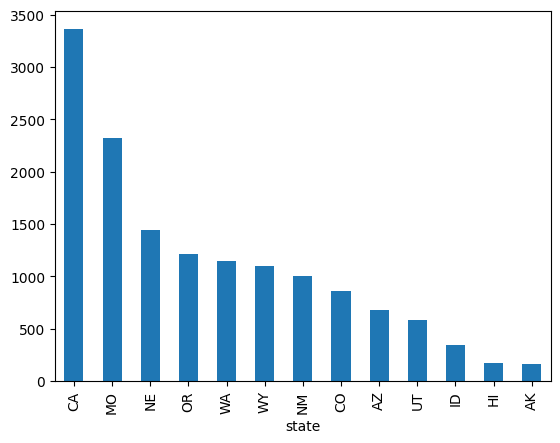

In [ ]:
df['state'].value_counts().plot(kind = 'bar')
plt.show()

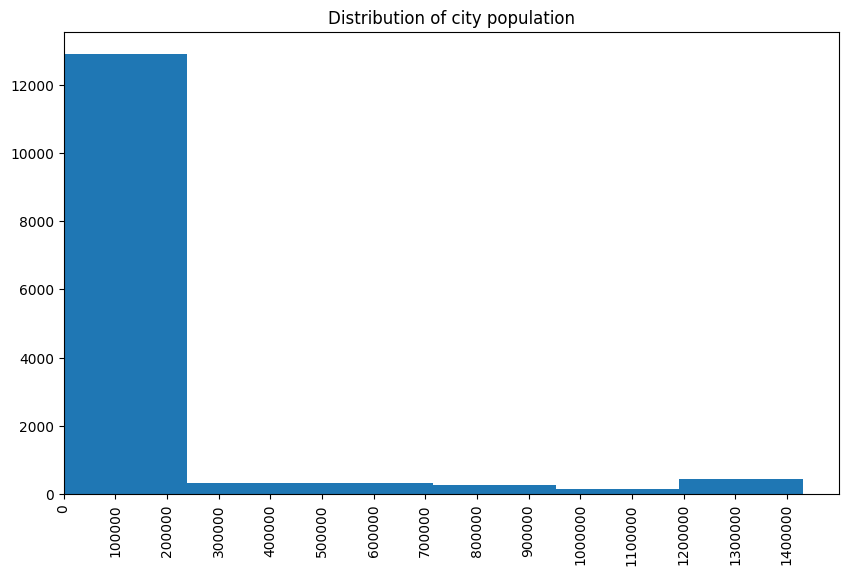

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(df['city_pop'])
plt.title('Distribution of city population')
plt.xticks(np.arange(0, 1500000, 100000), rotation = 90)
plt.xlim(0, 1500000)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

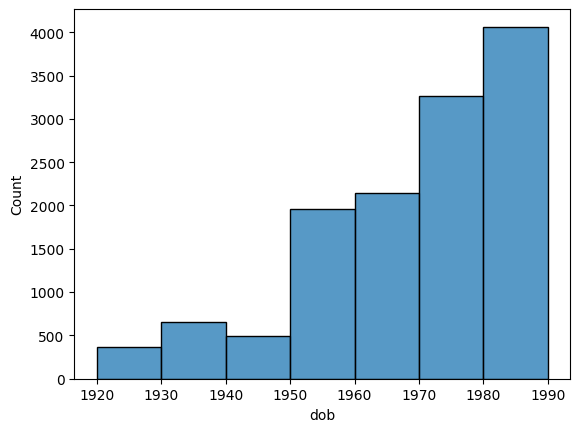

In [ ]:
dob_year = df['dob'].dt.year
min_dob_year = (dob_year.min()//10)*10
max_dob_year = (dob_year.max()//10)*10
bins = np.arange(min_dob_year, max_dob_year, 10)
sns.histplot(dob_year, bins = bins)
plt.show()

Transcations are increasing from every decade except for 1950 to 1960

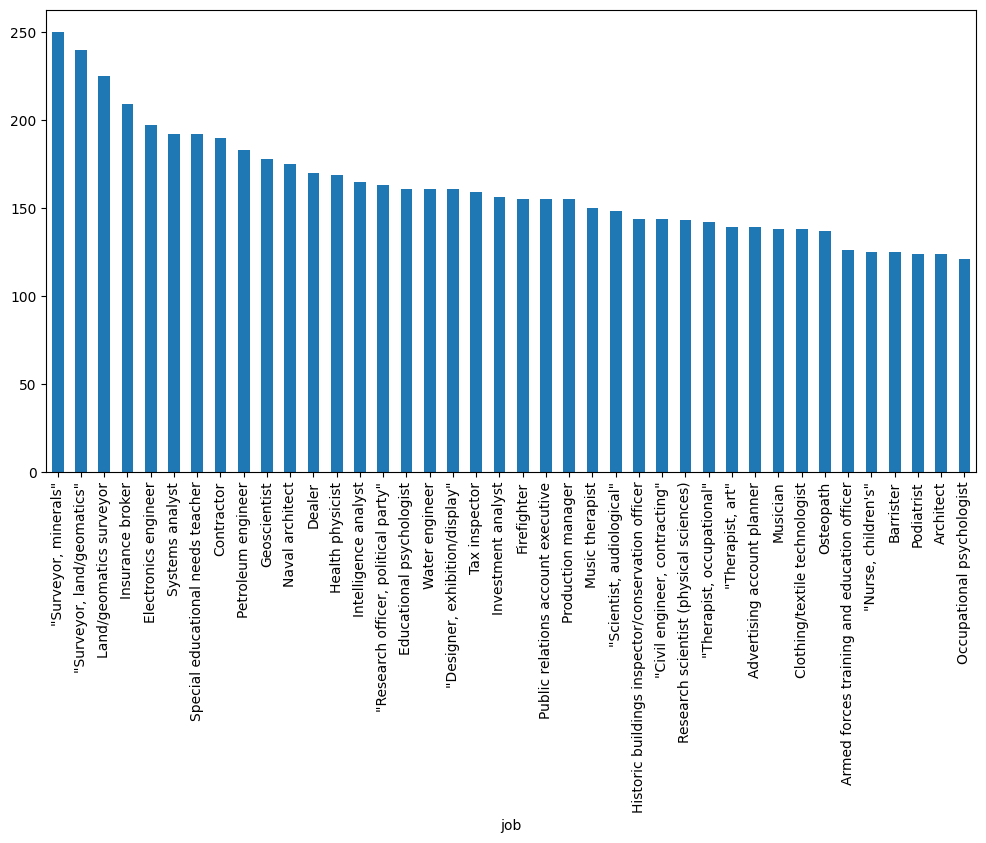

In [ ]:
plt.figure(figsize = (12, 6))
df['job'].value_counts().head(40).plot(kind = 'bar')
plt.show()

The surveyors are having highest transactions compared to other jobs

#### Bivariate Analysis

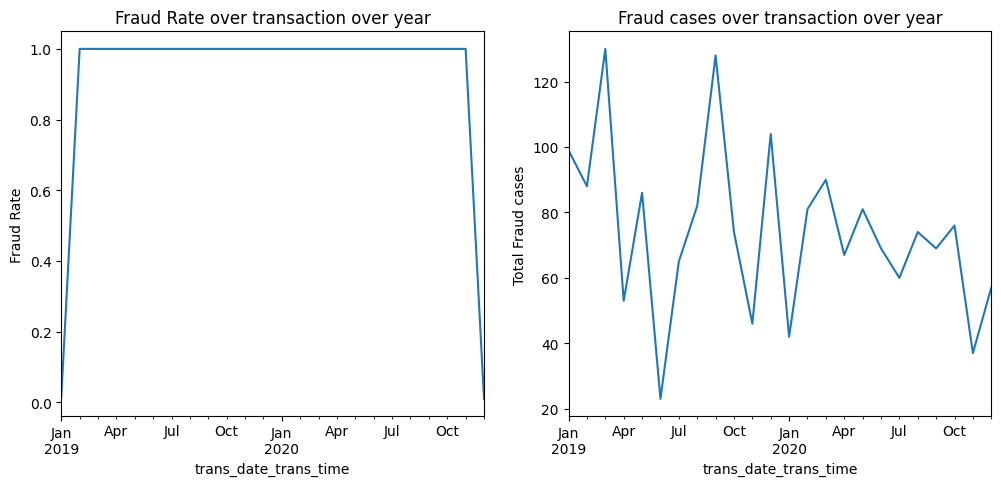

In [ ]:
fig,ax = plt.subplots(1, 2, figsize=(12, 5))

trans_month_year_fraud_rate = df.groupby(df['trans_date_trans_time'].dt.to_period('M'))['is_fraud'].mean()
#trans_month_year_fraud_rate.index = trans_month_year_fraud_rate.index.to_timestamp()
trans_month_year_fraud_rate.plot(kind = 'line', ax = ax[0])
ax[0].set_title('Fraud Rate over transaction over year')
ax[0].set_ylabel('Fraud Rate')

trans_month_year_fraud_cases = df.groupby(df['trans_date_trans_time'].dt.to_period('M'))['is_fraud'].sum()
#trans_month_year_fraud_cases.index = trans_month_year_fraud_cases.index.to_timestamp()
trans_month_year_fraud_cases.plot(kind = 'line', ax = ax[1])
ax[1].set_title('Fraud cases over transaction over year')
ax[1].set_ylabel('Total Fraud cases')
plt.show()

Fraud rate by every month is not fair comparision as most of the data we have are from first month 0f 2019 and last month of 2020. The fraud cases seems to high at 2019 compared to 2020

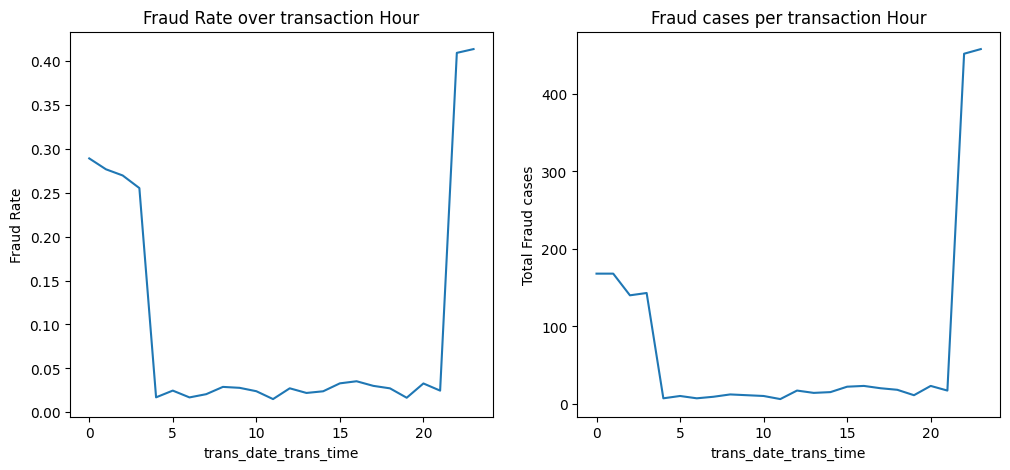

In [ ]:
fig,ax = plt.subplots(1, 2, figsize=(12, 5))

trans_hour_fraud_rate = df.groupby(df['trans_date_trans_time'].dt.hour)['is_fraud'].mean()
trans_hour_fraud_rate.plot(kind = 'line', ax = ax[0])
ax[0].set_title('Fraud Rate over transaction Hour')
ax[0].set_ylabel('Fraud Rate')

trans_hour_fraud_cases = df.groupby(df['trans_date_trans_time'].dt.hour)['is_fraud'].sum()
trans_hour_fraud_cases.plot(kind = 'line', ax = ax[1])
ax[1].set_title('Fraud cases per transaction Hour')
ax[1].set_ylabel('Total Fraud cases')
plt.show()

The fraud cases and fraud rate is directly  linked with each other. Most of the frauds cases and also fraud rate are happen after 20 hr

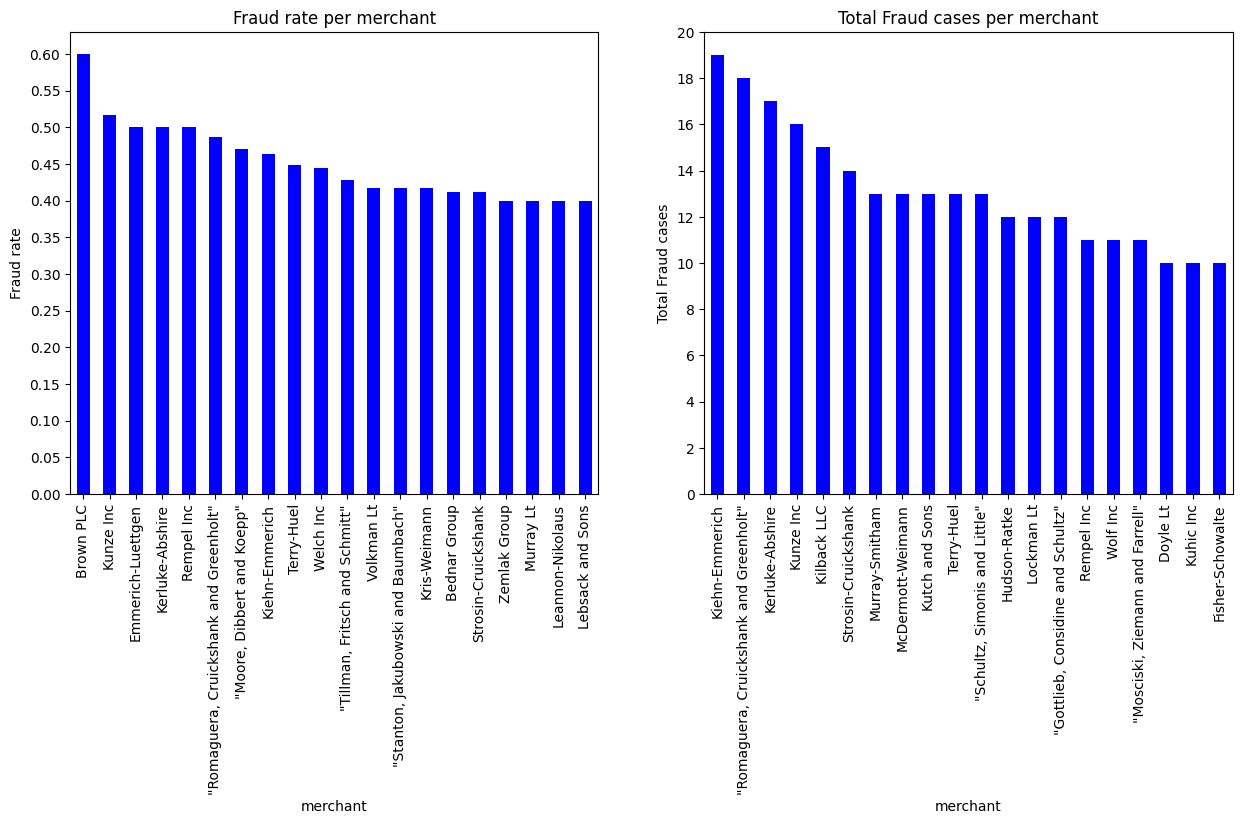

In [ ]:
fig,ax = plt.subplots(1, 2, figsize=(15, 6))

merchant_fraud_rate = df.groupby('merchant')['is_fraud'].mean().sort_values(ascending = False).head(20)
merchant_fraud_rate.plot(kind = 'bar', ax = ax[0], color = 'blue')
ax[0].set_yticks(np.arange(0, merchant_fraud_rate.max()+0.05, 0.05))
ax[0].set_title('Fraud rate per merchant')
ax[0].set_ylabel('Fraud rate')

merchant_total_cases = df.groupby('merchant')['is_fraud'].sum().sort_values(ascending = False).head(20)
merchant_total_cases.plot(kind = 'bar', ax = ax[1], color = 'blue')
ax[1].set_yticks(range(0, merchant_total_cases.max()+2, 2))
ax[1].set_title('Total Fraud cases per merchant')
ax[1].set_ylabel('Total Fraud cases')
plt.show()

Merchants with high fraud cases are having fraud rate around 50%. Maybe they are trying to make some real transaction through legitimate credit card to not get caught

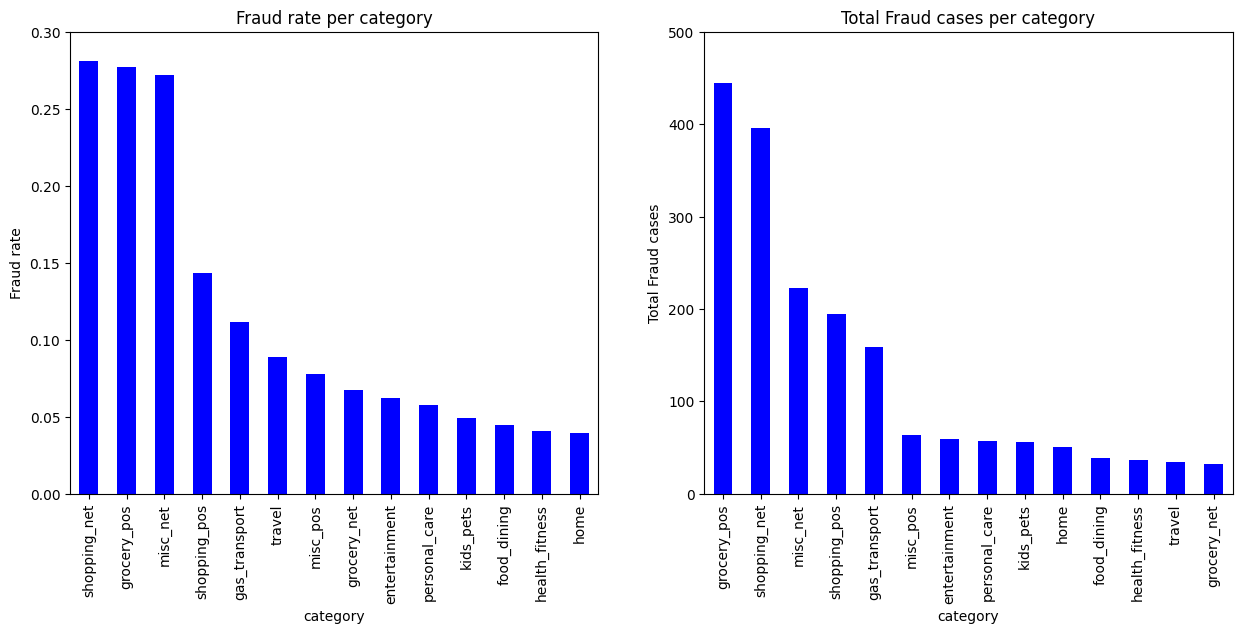

In [ ]:
fig,ax = plt.subplots(1, 2, figsize = (15, 6))

category_fraud_rate = df.groupby('category')['is_fraud'].mean().sort_values(ascending = False)
category_fraud_rate.plot(kind = 'bar', ax = ax[0], color = 'blue')
ax[0].set_yticks(np.arange(0, category_fraud_rate.max()+0.05, 0.05))
ax[0].set_title('Fraud rate per category')
ax[0].set_ylabel('Fraud rate')

category_total_cases = df.groupby('category')['is_fraud'].sum().sort_values(ascending = False)
category_total_cases.plot(kind = 'bar', ax = ax[1], color = 'blue')
ax[1].set_yticks(range(0 ,category_total_cases.max()+100, 100))
ax[1].set_title('Total Fraud cases per category')
ax[1].set_ylabel('Total Fraud cases')
plt.show()

misc_net has higher fraud cases and higher fraud rate even though the transaction are less than most of the categories

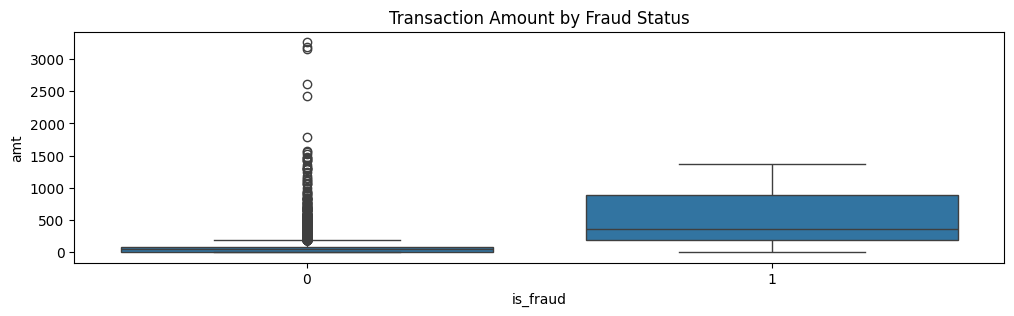

In [ ]:
fig, ax = plt.subplots(figsize = (12, 3)) 
sns.boxplot(x ='is_fraud', y = 'amt', data = df, ax = ax) 
ax.set_title("Transaction Amount by Fraud Status")
plt.show()

High amount is withdrawn in fraud transacion using credit card

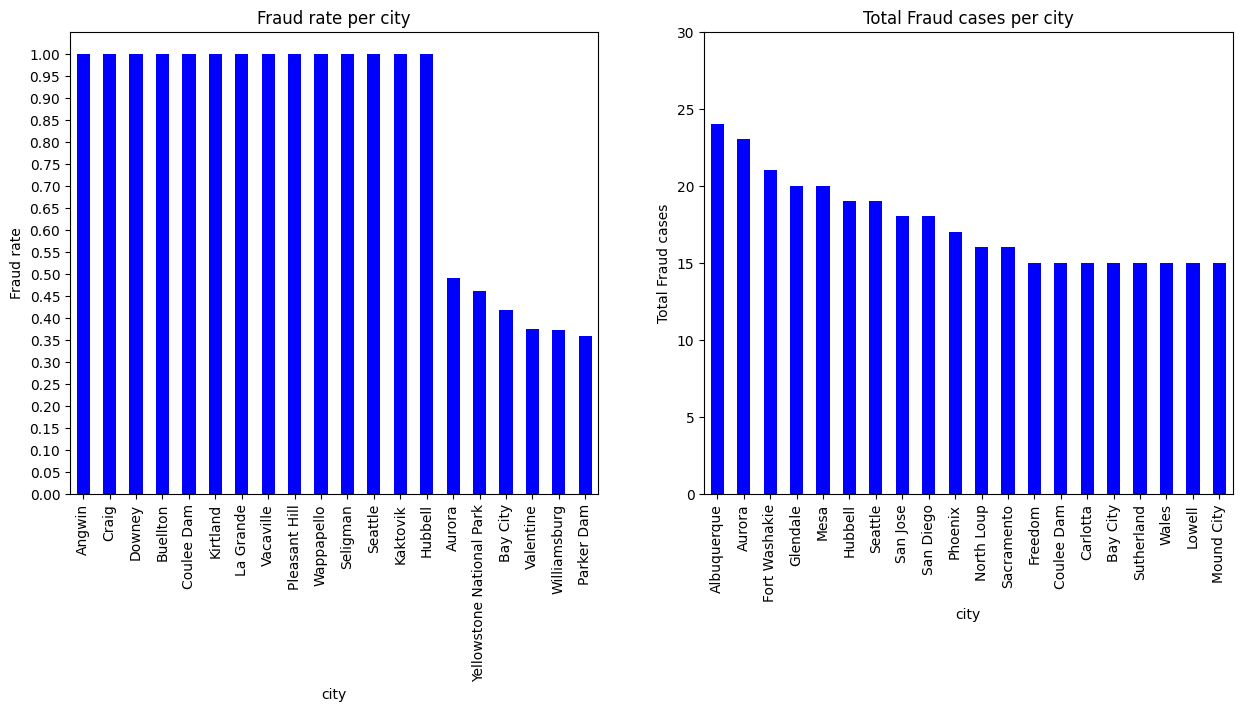

In [ ]:
fig,ax = plt.subplots(1, 2, figsize=(15, 6))

city_fraud_rate = df.groupby('city')['is_fraud'].mean().sort_values(ascending = False).head(20)
city_fraud_rate.plot(kind = 'bar', ax = ax[0], color = 'blue')
ax[0].set_yticks(np.arange(0, city_fraud_rate.max()+0.05, 0.05))
ax[0].set_title('Fraud rate per city')
ax[0].set_ylabel('Fraud rate')

city_total_cases = df.groupby('city')['is_fraud'].sum().sort_values(ascending = False).head(20)
city_total_cases.plot(kind = 'bar', ax = ax[1], color = 'blue')
ax[1].set_yticks(range(0, city_total_cases.max()+10, 5))
ax[1].set_title('Total Fraud cases per city')
ax[1].set_ylabel('Total Fraud cases')
plt.show()

Fraud rate of city with one are having less transactions but merchant who are changing their locations to not get caught are likely behind this transaction in this cities. 

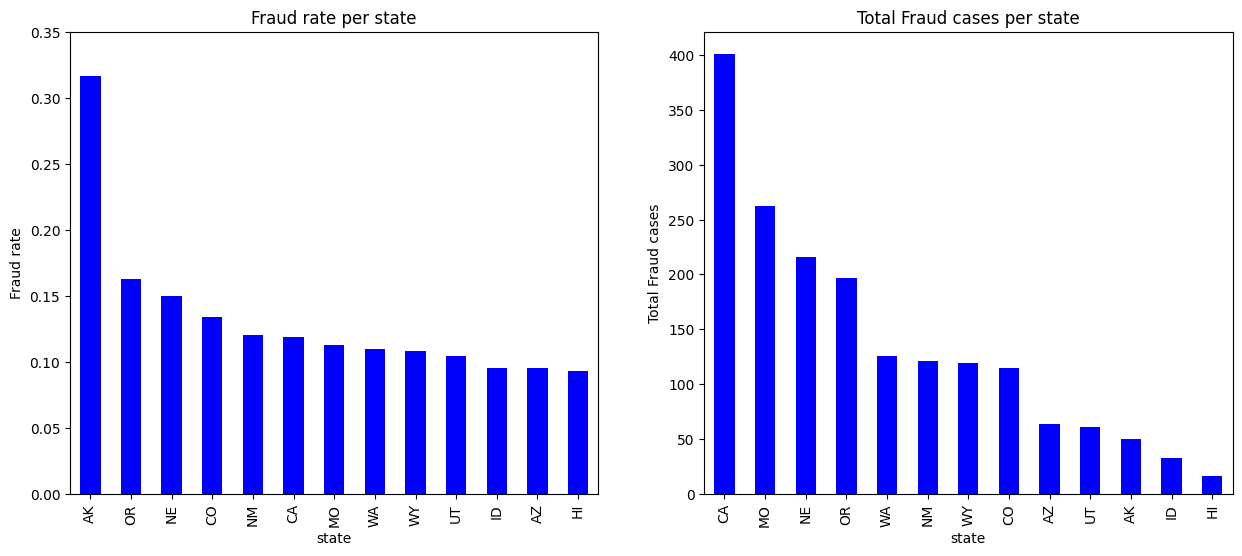

In [ ]:
fig,ax = plt.subplots(1, 2, figsize=(15, 6))

state_fraud_rate = df.groupby('state')['is_fraud'].mean().sort_values(ascending = False)
state_fraud_rate.plot(kind = 'bar', ax = ax[0], color = 'blue')
ax[0].set_yticks(np.arange(0, state_fraud_rate.max()+0.05, 0.05))
ax[0].set_title('Fraud rate per state')
ax[0].set_ylabel('Fraud rate')

state_total_cases = df.groupby('state')['is_fraud'].sum().sort_values(ascending = False)
state_total_cases.plot(kind = 'bar', ax = ax[1], color = 'blue')
ax[1].set_yticks(range(0, state_total_cases.max(), 50))
ax[1].set_title('Total Fraud cases per state')
ax[1].set_ylabel('Total Fraud cases')
plt.show()

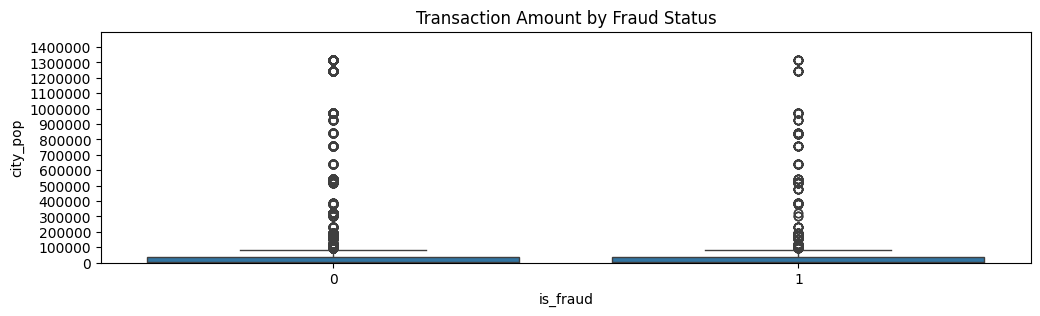

In [ ]:
fig, ax = plt.subplots(figsize = (12, 3)) 
sns.boxplot(x ='is_fraud', y = 'city_pop', data = df, ax = ax) 
ax.set_title("Transaction Amount by Fraud Status")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

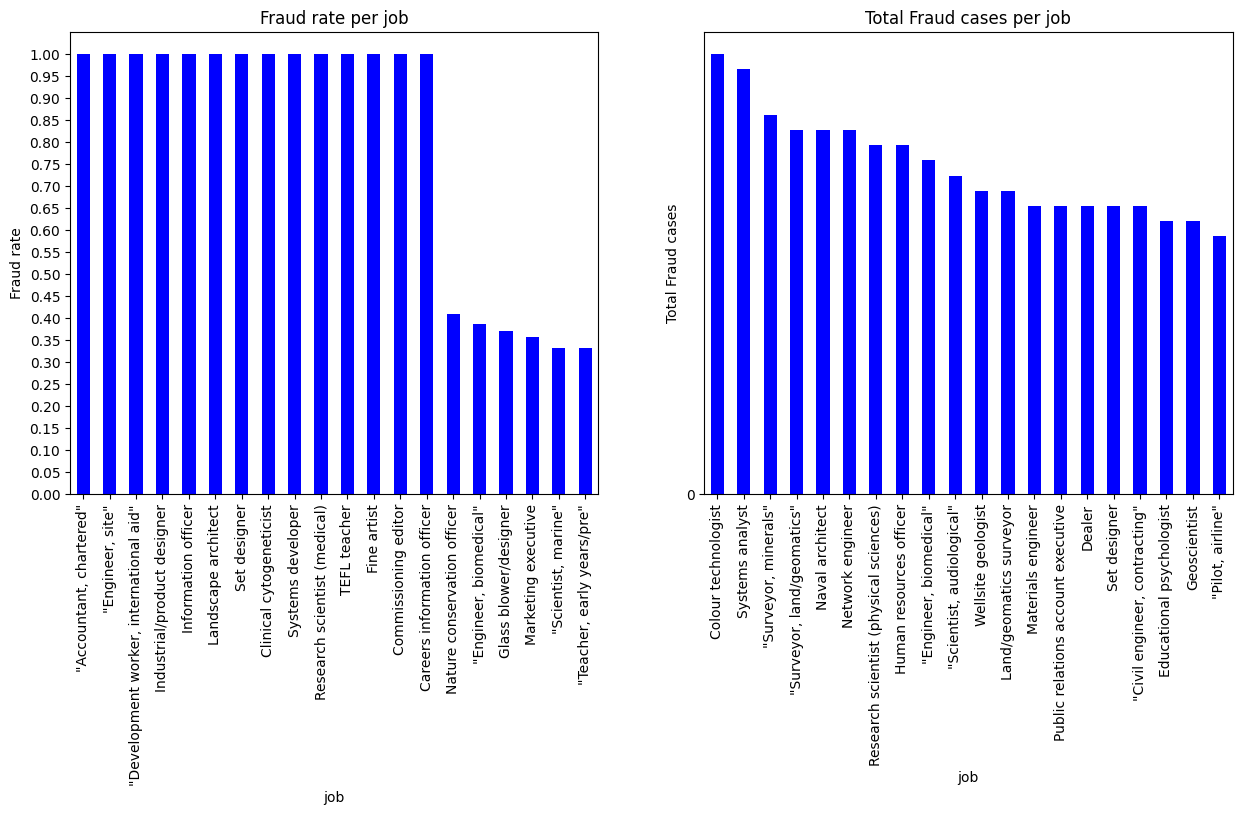

In [ ]:
fig,ax = plt.subplots(1, 2, figsize=(15, 6))

job_fraud_rate = df.groupby('job')['is_fraud'].mean().sort_values(ascending = False).head(20)
job_fraud_rate.plot(kind = 'bar', ax = ax[0], color = 'blue')
ax[0].set_yticks(np.arange(0, job_fraud_rate.max()+0.05, 0.05))
ax[0].set_title('Fraud rate per job')
ax[0].set_ylabel('Fraud rate')

job_total_cases = df.groupby('job')['is_fraud'].sum().sort_values(ascending = False).head(20)
job_total_cases.plot(kind = 'bar', ax = ax[1], color = 'blue')
ax[1].set_yticks(range(0, job_total_cases.max(), 50))
ax[1].set_title('Total Fraud cases per job')
ax[1].set_ylabel('Total Fraud cases')
plt.show()

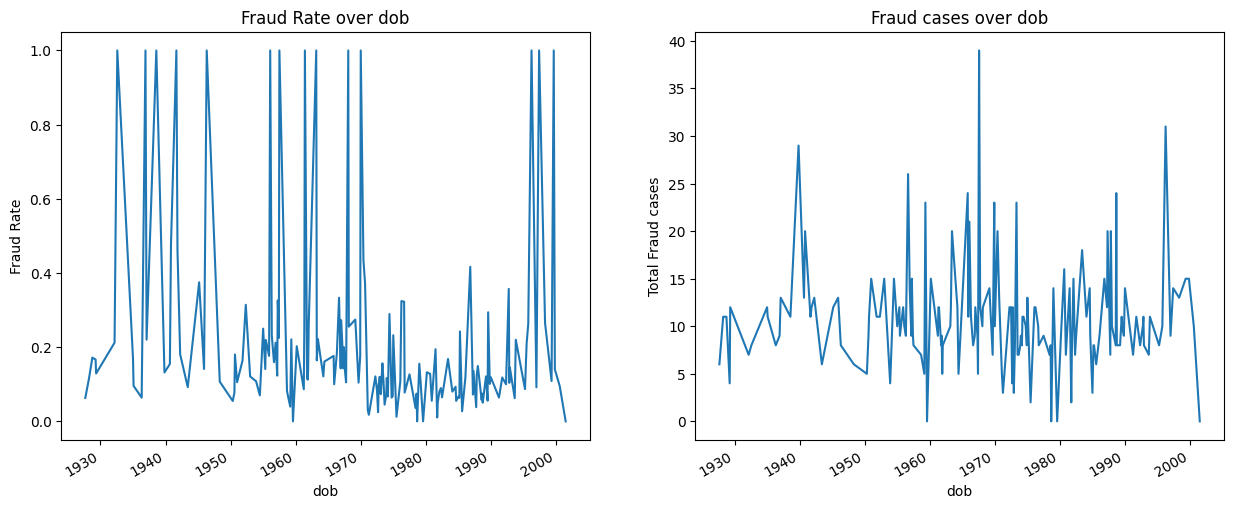

In [ ]:
fig,ax = plt.subplots(1, 2, figsize=(15, 6))

dob_fraud_rate = df.groupby(df['dob'].dt.to_period('M'))['is_fraud'].mean()
dob_fraud_rate.index = dob_fraud_rate.index.to_timestamp()
dob_fraud_rate.plot(kind = 'line', ax = ax[0])
ax[0].set_title('Fraud Rate over dob')
ax[0].set_ylabel('Fraud Rate')

dob_fraud_cases = df.groupby(df['dob'].dt.to_period('M'))['is_fraud'].sum()
dob_fraud_cases.index = dob_fraud_cases.index.to_timestamp()
dob_fraud_cases.plot(ax = ax[1])
ax[1].set_title('Fraud cases over dob')
ax[1].set_ylabel('Total Fraud cases')
plt.show()

#### Multivariate Analysis

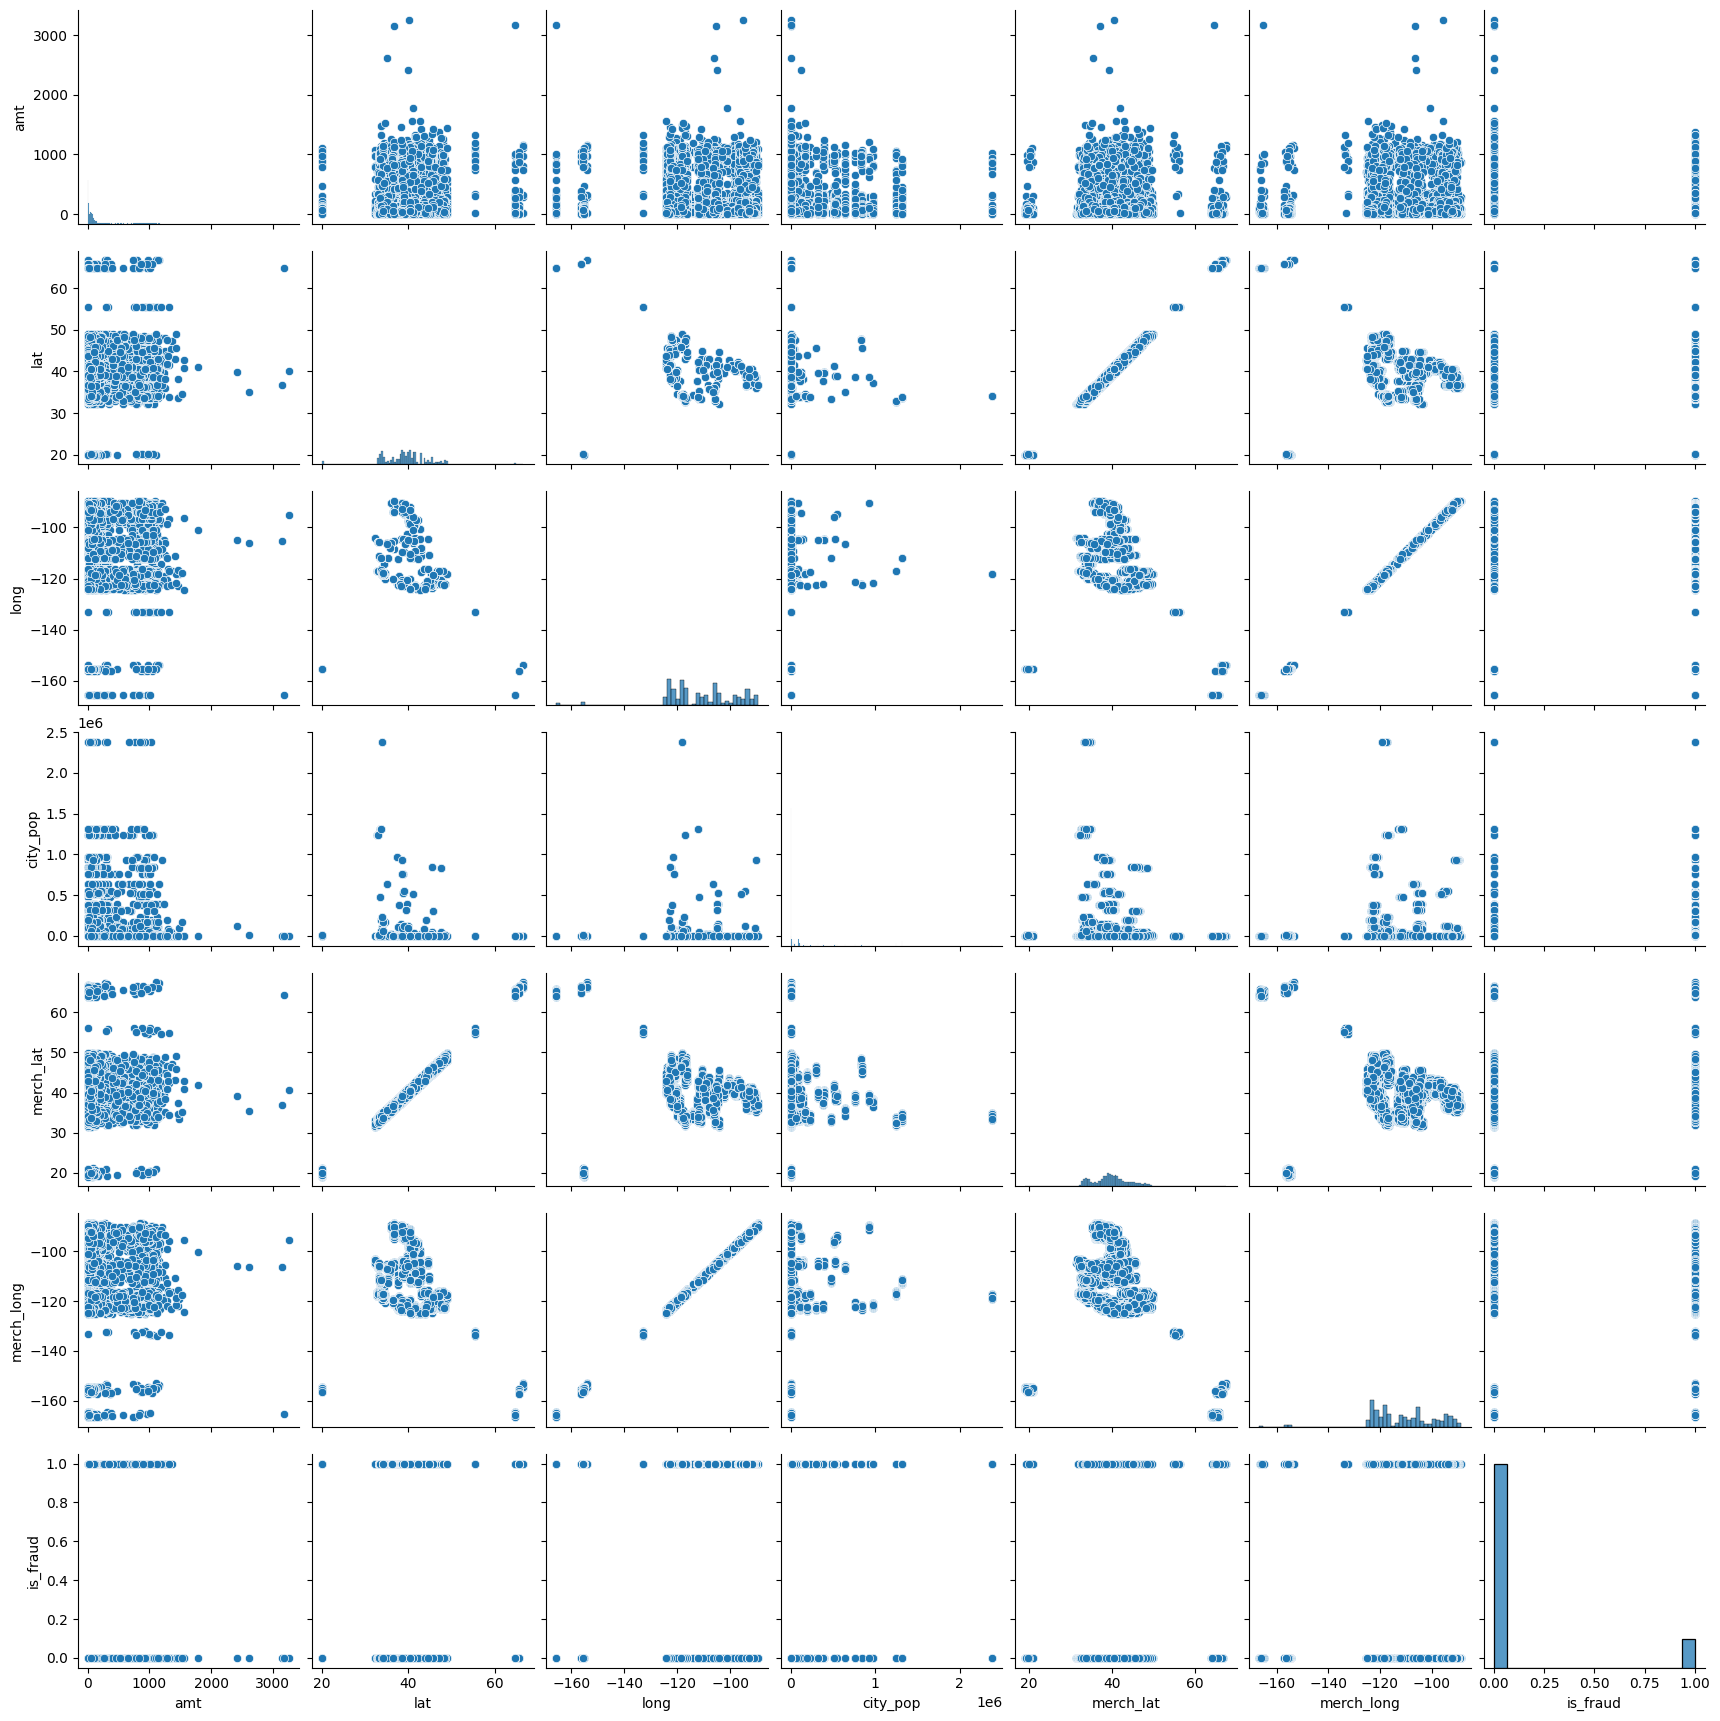

In [ ]:
sns.pairplot(df)
plt.show()

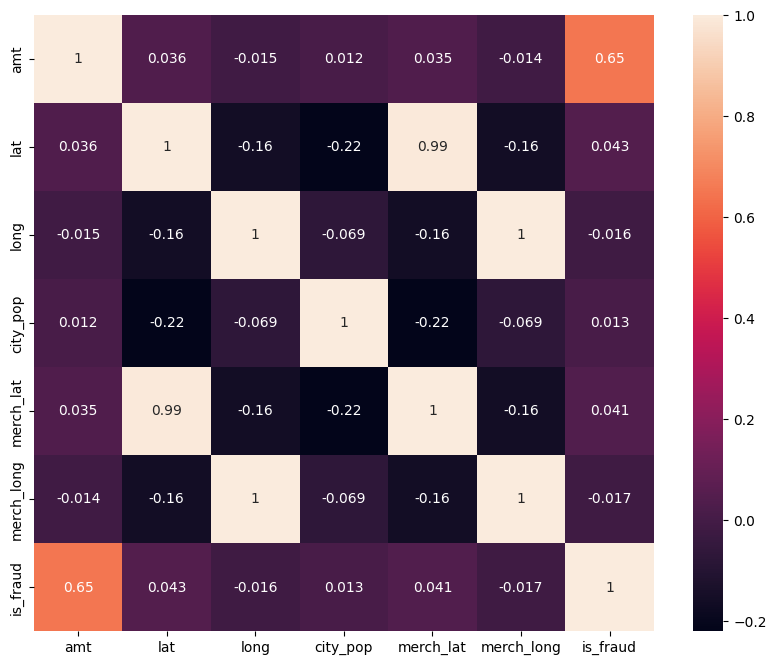

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

### Feature engineering and selection

In [ ]:
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['Age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

df = df.drop(['merch_lat', 'merch_long', 'trans_num', 'trans_date_trans_time', 'dob', 'merchant', 'state'], axis = 1)

The correlation between features may not be correct due to imbalanced data. However it is safe to remove 'trans_num','merch_lat','merch_long'.'trans_num' is a unique identifier and does not contribute to any information for fraud detection. 'lat' and 'merch_lat' are almost shows similar location and central tendency. The correlation is also high enough even for imbalanced dataset. 'long' and 'merch_long' have similar situaion to 'lat' and 'merch_lat'

The machine learning model cannot work with time series data. Instead, converting into multiple numerical columns may help machine learning model to obtain information from this columns.

In [ ]:
le = LabelEncoder()
category_columns = ['category', 'job', 'city']
label_encoders = {}
for col in category_columns:
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


scaler = StandardScaler()
numeric_columns = ['amt', 'lat', 'long', 'city_pop', 'Age', 'trans_year', 'trans_month', 'trans_day']
scalers = {}
for col in numeric_columns:
    df[col] = scaler.fit_transform(df[[col]])
    scalers[col] = scaler

In [ ]:
X = df.drop('is_fraud',axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)


In [ ]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'Xgboost' : XGBClassifier()
}

for name,model in models.items():
    model.fit(X_train, y_train)
    acc_score = cross_val_score(model, X_train, y_train)
    f1_score = cross_val_score(model, X_train, y_train, scoring = 'f1')
    print(f'Models:{name}, Accuracy_score:{acc_score.mean()*100:.2f}%, F1 Score:{f1_score.mean()*100:.2f}%')

Models:LogisticRegression, Accuracy_score:93.75%, F1 Score:68.42%
Models:DecisionTreeClassifier, Accuracy_score:99.36%, F1 Score:96.97%
Models:RandomForestClassifier, Accuracy_score:99.79%, F1 Score:99.27%
Models:Xgboost, Accuracy_score:99.75%, F1 Score:98.99%


In [ ]:
model = DecisionTreeClassifier()
param_grid = {
'criterion': ['gini', 'entropy'],
'max_depth': [5 ,10, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf':[2, 5, 7]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'precision', cv = 5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_dt = best_model.predict(X_test)
print(f'Best Parameters:{grid_search.best_params_}')

Best Parameters:{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
report_dt = classification_report(y_test, y_pred_dt, output_dict = True, target_names = ['Not Fraud', 'Fraud'])
report_df1 = pd.DataFrame(report_dt).transpose().reset_index().rename(columns = {'index':'class'})
print(f'The classification Report of Decision tree with no sampling:\n{report_df1}')

final_report_list = []
report_df1['model'] = 'Decision Tree'
report_df1['sampling'] = 'No sampling'
final_report_list.append(report_df1)

The classification Report of Decision tree with no sampling:
          class  precision    recall  f1-score      support
0     Not Fraud   0.998939  0.998674  0.998807  3771.000000
1         Fraud   0.990826  0.992647  0.991736   544.000000
2      accuracy   0.997914  0.997914  0.997914     0.997914
3     macro avg   0.994882  0.995661  0.995271  4315.000000
4  weighted avg   0.997916  0.997914  0.997915  4315.000000


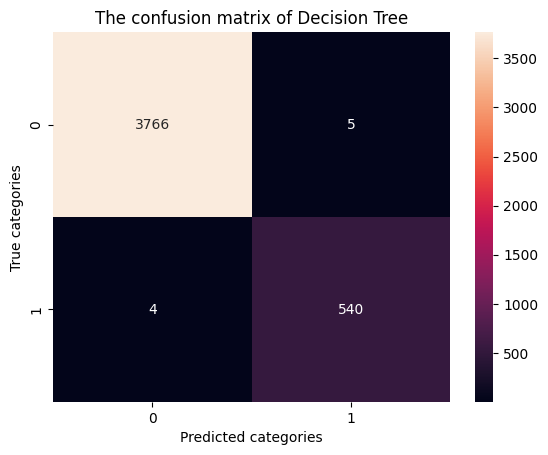

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(data = cm, annot = True, fmt = 'd')
plt.xlabel('Predicted categories')
plt.ylabel('True categories')
plt.title('The confusion matrix of Decision Tree')
plt.show()

In [ ]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 70, 100],
    'max_depth': [20, 30],
    'class_weight': [{0:1,1:3}, {0:1,1:5}]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'recall')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_rf = best_model.predict(X_test)
print(f'Best parameters:{ grid_search.best_params_}')

Best parameters:{'class_weight': {0: 1, 1: 3}, 'max_depth': 30, 'n_estimators': 100}


In [ ]:
report_rf = classification_report(y_test, y_pred_rf, output_dict = True, target_names = ['Not Fraud','Fraud'])
report_df2 = pd.DataFrame(report_rf).transpose().reset_index().rename(columns = {'index':'class'})
print(f'The classification Report of Random Forest with no sampling:\n{report_df2}')
report_df2['model'] = 'Random Forest'
report_df2['sampling'] = 'No sampling'
final_report_list.append(report_df2)

The classification Report of Random Forest with no sampling:
          class  precision    recall  f1-score      support
0     Not Fraud   0.999470  0.999735  0.999602  3771.000000
1         Fraud   0.998158  0.996324  0.997240   544.000000
2      accuracy   0.999305  0.999305  0.999305     0.999305
3     macro avg   0.998814  0.998029  0.998421  4315.000000
4  weighted avg   0.999304  0.999305  0.999304  4315.000000


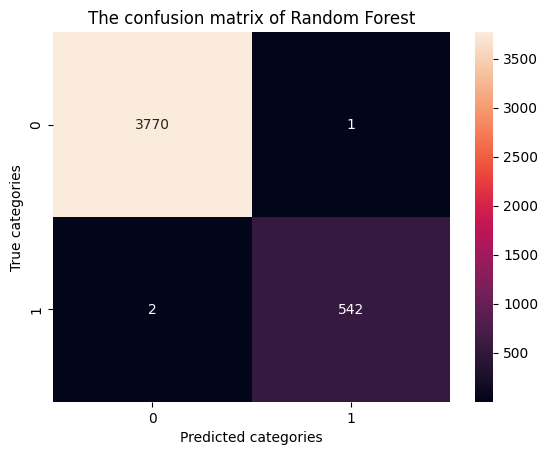

In [ ]:
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(data = cm,annot = True,fmt = 'd')
plt.xlabel('Predicted categories')
plt.ylabel('True categories')
plt.title('The confusion matrix of Random Forest')
plt.show()

In [ ]:
model = XGBClassifier()
param_grid = {
    'max_depth': [10, 20],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [150, 200],
    'subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test)
print(f'Best Parameters:{grid_search.best_params_}')

Best Parameters:{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
report_xgb = classification_report(y_test, y_pred_xgb, output_dict = True, target_names = ['Not Fraud', 'Fraud'])
report_df3 = pd.DataFrame(report_xgb).transpose().reset_index().rename(columns = {'index':'class'})
print(f'The classification Report of Xgboost with no sampling:\n{report_df3}')
report_df3['model'] = 'xgboost'
report_df3['sampling'] = 'No sampling'
final_report_list.append(report_df3)

The classification Report of Xgboost with no sampling:
          class  precision    recall  f1-score      support
0     Not Fraud   0.999205  0.999470  0.999337  3771.000000
1         Fraud   0.996317  0.994485  0.995400   544.000000
2      accuracy   0.998841  0.998841  0.998841     0.998841
3     macro avg   0.997761  0.996977  0.997369  4315.000000
4  weighted avg   0.998841  0.998841  0.998841  4315.000000


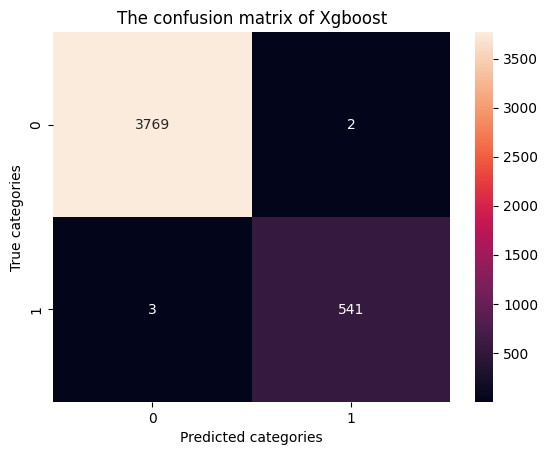

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(data = cm, annot = True, fmt = 'd')
plt.xlabel('Predicted categories')
plt.ylabel('True categories')
plt.title('The confusion matrix of Xgboost')
plt.show()

#### Undersampling

In [ ]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'SVC' : SVC(),
    'Xgboost' : XGBClassifier()
}

for name,model in models.items():
    acc_score = cross_val_score(model, X_train_rus, y_train_rus, cv = 5)
    f1_score = cross_val_score(model, X_train_rus, y_train_rus, cv = 5, scoring = 'f1')
    print(f'Models:{name}, Accuracy:{acc_score.mean()*100:.2f}%, F1 score:{f1_score.mean()*100:.2f}%')

Models:LogisticRegression, Accuracy:84.68%, F1 score:83.11%
Models:DecisionTreeClassifier, Accuracy:98.10%, F1 score:98.14%
Models:RandomForestClassifier, Accuracy:99.31%, F1 score:99.40%
Models:SVC, Accuracy:62.57%, F1 score:59.05%
Models:Xgboost, Accuracy:99.39%, F1 score:99.39%


In [ ]:
model = DecisionTreeClassifier()
param_grid = {
'criterion': ['gini', 'entropy'],
'max_depth': [100, 150, 200],
'min_samples_split': [2, 5, 10],
'min_samples_leaf':[1 ,2, 3]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'f1', cv = 5)
grid_search.fit(X_train_rus, y_train_rus)
best_model = grid_search.best_estimator_
y_pred_dt_rus = best_model.predict(X_test)
print(f'Best Parameters:{grid_search.best_params_}')

Best Parameters:{'criterion': 'entropy', 'max_depth': 150, 'min_samples_leaf': 3, 'min_samples_split': 10}


In [ ]:
report_dt_rus = classification_report(y_test, y_pred_dt_rus, output_dict = True, target_names = ['Not Fraud', 'Fraud'])
report_df4 = pd.DataFrame(report_dt_rus).transpose().reset_index().rename(columns = {'index':'class'})
print(f'The classification Report of Decision Tree with Undersampling:\n{report_df4}')
report_df4['model'] = 'Decision Tree'
report_df4['sampling'] = 'Undersampling'
final_report_list.append(report_df4)

The classification Report of Decision Tree with Undersampling:
          class  precision    recall  f1-score      support
0     Not Fraud   0.997302  0.980111  0.988632  3771.000000
1         Fraud   0.876847  0.981618  0.926279   544.000000
2      accuracy   0.980301  0.980301  0.980301     0.980301
3     macro avg   0.937074  0.980865  0.957456  4315.000000
4  weighted avg   0.982116  0.980301  0.980771  4315.000000


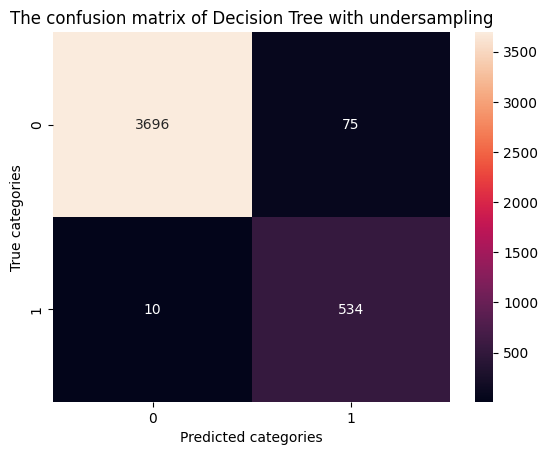

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt_rus)
sns.heatmap(data = cm, annot = True, fmt='d')
plt.xlabel('Predicted categories')
plt.ylabel('True categories')
plt.title('The confusion matrix of Decision Tree with undersampling')
plt.show()

In [ ]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 70, 100],
    'max_depth': [20, 30],
    'class_weight': [{0:1,1:3}, {0:1,1:5}]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'f1')
grid_search.fit(X_train_rus, y_train_rus)
best_model = grid_search.best_estimator_
y_pred_rf_rus = best_model.predict(X_test)
print(f'Best parameters:{grid_search.best_params_}')

Best parameters:{'class_weight': {0: 1, 1: 3}, 'max_depth': 30, 'n_estimators': 100}


In [ ]:
report_rf_rus = classification_report(y_test, y_pred_rf_rus, output_dict = True, target_names = ['Not Fraud', 'Fraud'])
report_df5 = pd.DataFrame(report_rf_rus).transpose().reset_index().rename(columns = {'index':'class'})
print(f'The classification Report of Random Forest with Undersampling:\n{report_df5}')
report_df5['model'] = 'Random Forest'
report_df5['sampling'] = 'Undersampling'
final_report_list.append(report_df5)

The classification Report of Random Forest with Undersampling:
          class  precision    recall  f1-score      support
0     Not Fraud   0.999464  0.989128  0.994269  3771.000000
1         Fraud   0.929674  0.996324  0.961846   544.000000
2      accuracy   0.990035  0.990035  0.990035     0.990035
3     macro avg   0.964569  0.992726  0.978057  4315.000000
4  weighted avg   0.990666  0.990035  0.990181  4315.000000


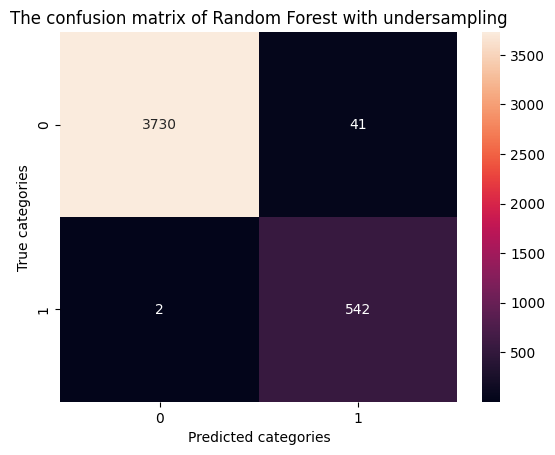

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf_rus)
sns.heatmap(data = cm, annot = True, fmt='d')
plt.xlabel('Predicted categories')
plt.ylabel('True categories')
plt.title('The confusion matrix of Random Forest with undersampling')
plt.show()

In [ ]:
model = XGBClassifier()

param_grid = {
    'max_depth': [15, 20],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [200, 250],
    'subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'f1')
grid_search.fit(X_train_rus, y_train_rus)
best_model = grid_search.best_estimator_
y_pred_xgb_rus = best_model.predict(X_test)
print(f'Best Parameters:{grid_search.best_params_}')

Best Parameters:{'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
report_xgb_rus = classification_report(y_test, y_pred_xgb_rus, output_dict = True, target_names = ['Not Fraud', 'Fraud'])
report_df6 = pd.DataFrame(report_xgb_rus).transpose().reset_index().rename(columns = {'index':'class'})
print(f'The classification Report of Xgboost with Undersampling:\n{report_df6}')
report_df6['model'] = 'Xgboost'
report_df6['sampling'] = 'Undersampling'
final_report_list.append(report_df6)

The classification Report of Xgboost with Undersampling:
          class  precision    recall  f1-score      support
0     Not Fraud   0.999201  0.995227  0.997210  3771.000000
1         Fraud   0.967800  0.994485  0.980961   544.000000
2      accuracy   0.995133  0.995133  0.995133     0.995133
3     macro avg   0.983500  0.994856  0.989086  4315.000000
4  weighted avg   0.995242  0.995133  0.995161  4315.000000


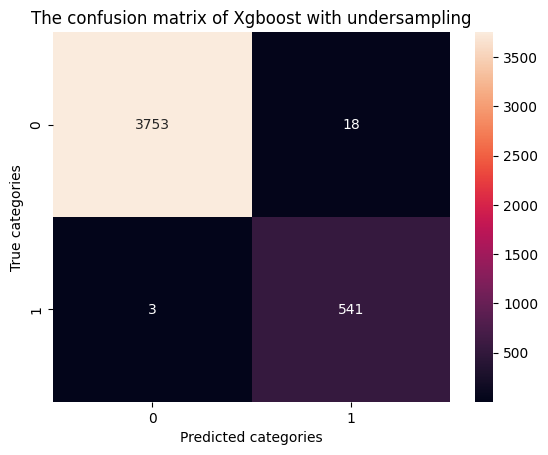

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb_rus)
sns.heatmap(data = cm, annot = True, fmt='d')
plt.xlabel('Predicted categories')
plt.ylabel('True categories')
plt.title('The confusion matrix of Xgboost with undersampling')
plt.show()

#### Oversampling


In [ ]:
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'Xgboost' : XGBClassifier()
}

for name, model in models.items():
    acc_score = cross_val_score(model, X_train_smote, y_train_smote, cv = 5)
    f1_score =  cross_val_score(model, X_train_smote, y_train_smote, scoring = 'f1', cv = 5)
    print(f'Models:{name}, Accuracy:{acc_score.mean()*100:.2f}%, F1 score:{f1_score.mean()*100:.2f}%')

Models:LogisticRegression, Accuracy:86.96%, F1 score:86.04%
Models:DecisionTreeClassifier, Accuracy:99.82%, F1 score:99.82%
Models:RandomForestClassifier, Accuracy:99.93%, F1 score:99.93%
Models:Xgboost, Accuracy:99.92%, F1 score:99.92%


In [ ]:
model = DecisionTreeClassifier()
param_grid = {
'criterion': ['gini', 'entropy'],
'max_depth': [20, 30, 40],
'min_samples_split': [2 ,5, 10],
'min_samples_leaf':[1 ,2 ,3]
}

grid_search = GridSearchCV(estimator = model, param_grid= param_grid, scoring = 'f1', cv = 5)
grid_search.fit(X_train_smote, y_train_smote)
best_model = grid_search.best_estimator_
y_pred_dt_smote = best_model.predict(X_test)
print(f'Best Parameters:{grid_search.best_params_}')

Best Parameters:{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
report_dt_smote = classification_report(y_test, y_pred_dt_smote ,output_dict = True, target_names = ['Not Fraud','Fraud'])
report_df7 = pd.DataFrame(report_dt_smote).transpose().reset_index().rename(columns = {'index':'class'})
print(f'The classification Report of Decision Tree with Oversampling:\n{report_df7}')
report_df7['model'] = 'Decision Tree'
report_df7['sampling'] = 'Oversampling'
final_report_list.append(report_df7)

The classification Report of Decision Tree with Oversampling:
          class  precision    recall  f1-score      support
0     Not Fraud   0.999469  0.999204  0.999337  3771.000000
1         Fraud   0.994495  0.996324  0.995409   544.000000
2      accuracy   0.998841  0.998841  0.998841     0.998841
3     macro avg   0.996982  0.997764  0.997373  4315.000000
4  weighted avg   0.998842  0.998841  0.998842  4315.000000


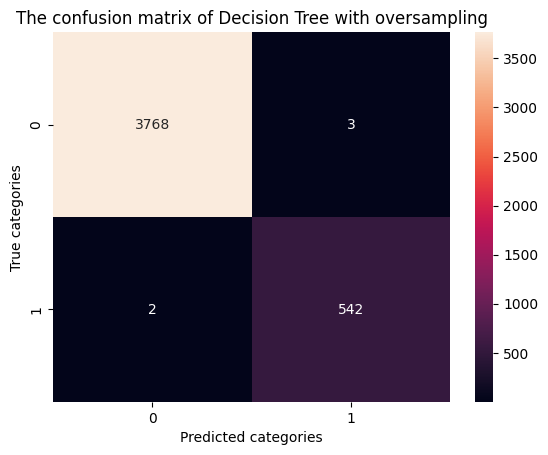

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt_smote)
sns.heatmap(data = cm, annot = True, fmt='d')
plt.xlabel('Predicted categories')
plt.ylabel('True categories')
plt.title('The confusion matrix of Decision Tree with oversampling')
plt.show()

In [ ]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 70],
    'max_depth': [10, 20],
    'class_weight': [{0:1,1:3}, {0:1,1:5}]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'f1')
grid_search.fit(X_train_smote, y_train_smote)
best_model = grid_search.best_estimator_
y_pred_rf_smote = best_model.predict(X_test)
print(f'Best parameters:\n{grid_search.best_params_}')

Best parameters:
{'class_weight': {0: 1, 1: 5}, 'max_depth': 20, 'n_estimators': 70}


In [ ]:
report_rf_smote = classification_report(y_test, y_pred_rf_smote, output_dict = True, target_names = ['Not Fraud','Fraud'])
report_df8 = pd.DataFrame(report_rf_smote).transpose().reset_index().rename(columns = {'index':'class'})
print(f'The classification Report of Random Forest with Oversampling:\n{report_df8}')
report_df8['model'] = 'Random Forest'
report_df8['sampling'] = 'Oversampling'
final_report_list.append(report_df8)

The classification Report of Random Forest with Oversampling:
          class  precision    recall  f1-score     support
0     Not Fraud   0.999204  0.999204  0.999204  3771.00000
1         Fraud   0.994485  0.994485  0.994485   544.00000
2      accuracy   0.998610  0.998610  0.998610     0.99861
3     macro avg   0.996845  0.996845  0.996845  4315.00000
4  weighted avg   0.998610  0.998610  0.998610  4315.00000


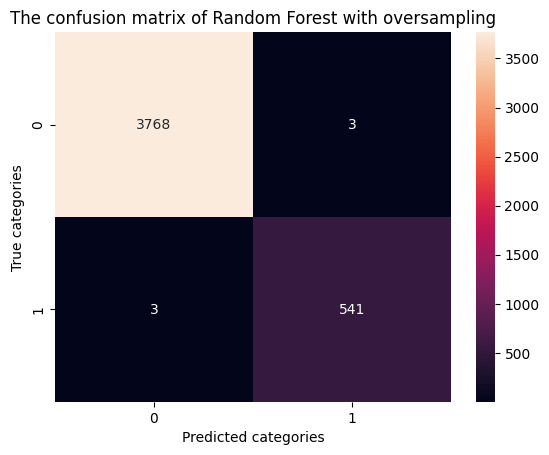

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf_smote)
sns.heatmap(data = cm, annot = True, fmt='d')
plt.xlabel('Predicted categories')
plt.ylabel('True categories')
plt.title('The confusion matrix of Random Forest with oversampling')
plt.show()

In [ ]:
model = XGBClassifier()
param_grid = {
    'max_depth': [20, 25],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [300, 350],
    'subsample': [0.3, 0.6],
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'f1')
grid_search.fit(X_train_smote, y_train_smote)
best_model = grid_search.best_estimator_
y_pred_xgb_smote = best_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 20, 'n_estimators': 300, 'subsample': 0.6}


In [ ]:
report9 = classification_report(y_test, y_pred_xgb_smote, output_dict = True, target_names = ['Not Fraud', 'Fraud'])
report_df9 = pd.DataFrame(report9).transpose().reset_index().rename(columns = {'index':'class'})
print(f'The classification Report of Xgboost with Oversampling:\n{report_df9}')
report_df9['model'] = 'Xgboost'
report_df9['sampling'] = 'Oversampling'
final_report_list.append(report_df9)

The classification Report of Xgboost with Oversampling:
          class  precision    recall  f1-score      support
0     Not Fraud   1.000000  0.999470  0.999735  3771.000000
1         Fraud   0.996337  1.000000  0.998165   544.000000
2      accuracy   0.999537  0.999537  0.999537     0.999537
3     macro avg   0.998168  0.999735  0.998950  4315.000000
4  weighted avg   0.999538  0.999537  0.999537  4315.000000


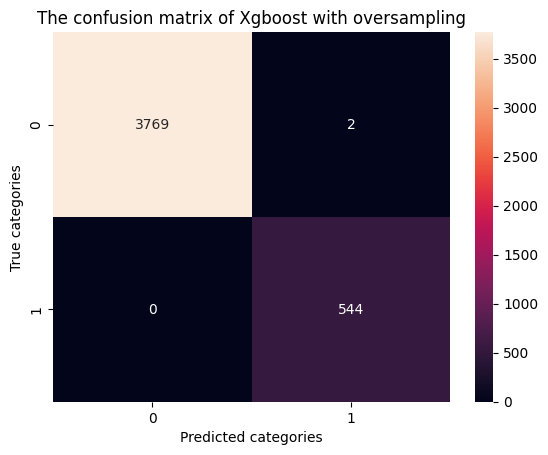

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb_smote)
sns.heatmap(data = cm, annot = True, fmt = 'd')
plt.xlabel('Predicted categories')
plt.ylabel('True categories')
plt.title('The confusion matrix of Xgboost with oversampling')
plt.show()

In [ ]:
final_report = pd.concat(final_report_list, ignore_index=True)
final_report = final_report[['model', 'sampling', 'class','precision', 'recall', 'f1-score']]
final_report['precision'] = final_report['precision']*100
final_report['recall'] = final_report['recall']*100
final_report['f1-score'] = final_report['f1-score']*100
final_report[final_report['class'] == 'Fraud']

,model,sampling,class,precision,recall,f1-score
1,Decision Tree,No sampling,Fraud,99.082569,99.264706,99.173554
6,Random Forest,No sampling,Fraud,99.815838,99.632353,99.724011
11,xgboost,No sampling,Fraud,99.631676,99.448529,99.540018
16,Decision Tree,Undersampling,Fraud,87.684729,98.161765,92.627927
21,Random Forest,Undersampling,Fraud,92.967410,99.632353,96.184561
26,Xgboost,Undersampling,Fraud,96.779964,99.448529,98.096102
31,Decision Tree,Oversampling,Fraud,99.449541,99.632353,99.540863
36,Random Forest,Oversampling,Fraud,99.448529,99.448529,99.448529
41,Xgboost,Oversampling,Fraud,99.633700,100.000000,99.816514
